# Breast Cancer Wisconsin (Diagnostic) Data Set

In [66]:
import numpy as np
import pandas as pd
#autres

### Importer les data

In [67]:
data = pd.read_csv("./data.csv", sep=",")

### Afficher les information du dataset

In [68]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Analyser la target

In [69]:
# array(['M', 'B'], dtype=object)
data['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

### Afficher les statistiques du dataset

In [70]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Drop les colonnes non utiles 

In [71]:
data = data.drop(columns=['id', 'Unnamed: 32'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Transformer votre target en 0/1 

In [72]:
#df.diagnosis.replace(to_replace = dict(M=0, B=1), inplace=True)
diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Normaliser vos features 

In [73]:
from sklearn import preprocessing

#def normalize(df):
 #   result = df.copy()
  #  for feature_name in df.columns:
   #     max_value = df[feature_name].max()
    #    min_value = df[feature_name].min()
     #   result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
   # return result

#result = normalize(data)

result = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
result.columns = list(data.iloc[:, 1:32].columns)

print(result)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  sym

In [74]:
#from sklearn.preprocessing import MinMaxScaler

#df = data.copy()
#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(df) 
#df.loc[:,:] = scaled_values
#df.head()

### Ploter la répartition de la target

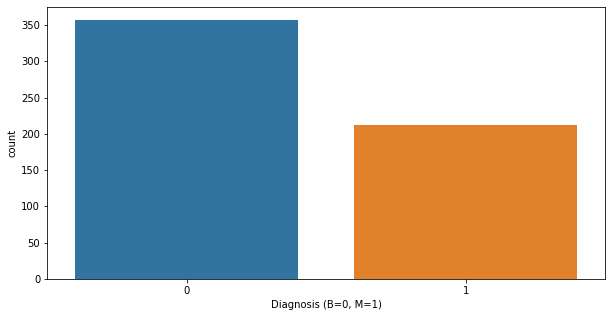

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
# Creating a bar plot
ax = sns.countplot(data['diagnosis'], label='Total Number of Patients')
# Add labels to your graph
plt.xlabel('Diagnosis (B=0, M=1)')
plt.show()

### Faire une fonction qui permet d'afficher le % des gens qui on un cancer grave 

In [76]:
# '37.258%'

totalM = data['diagnosis'][data['diagnosis'] == 1].count()
res = ( totalM/data.shape[0] ) * 100
print("{:.3f}%".format(res))
    

37.258%


### Affichier les colonnes du dataset

In [77]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Regrouper dans un dataFrame la target avec les 'data moyenne' 

In [78]:
target = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
target.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### Afficher la heatmap de ce dataFrame

<AxesSubplot:>

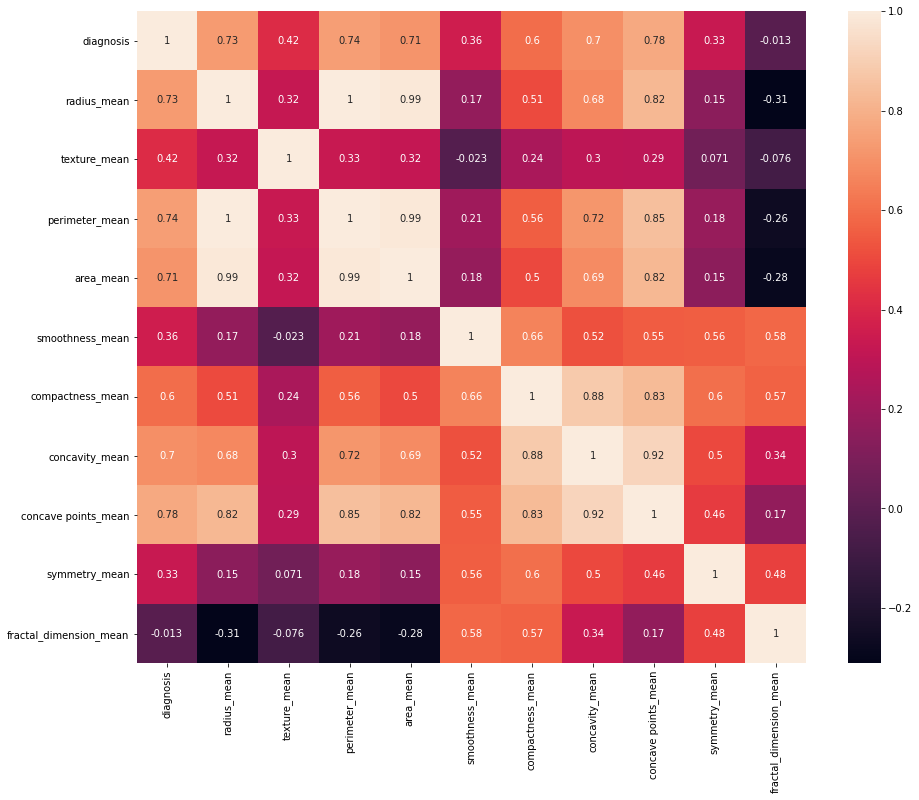

In [79]:
plt.figure(figsize=(15,12))
sns.heatmap(target.corr(), annot=True)

### Feature importance
Cibler les features qui ont une corrélation importante avec la variable cible **diagnosis**.

### Afficher le graphique des malades en fonction de 'perimeter_mean'

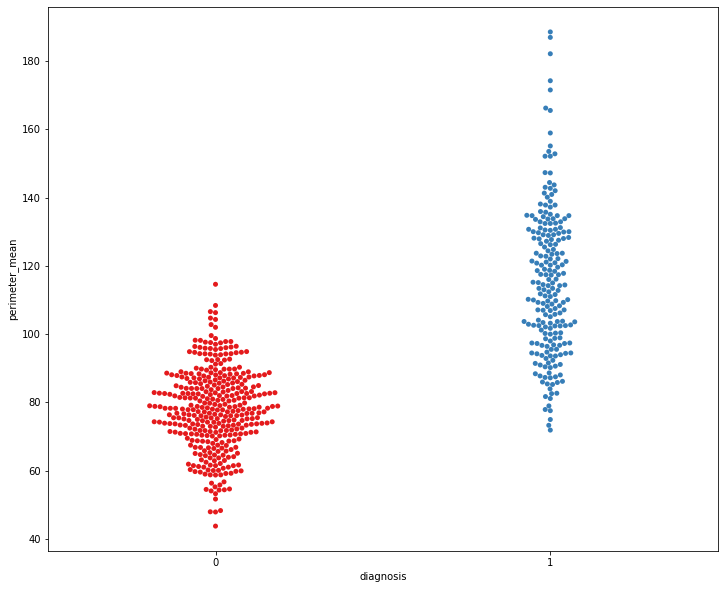

In [80]:
plt.figure(figsize=(12,10))
sns.swarmplot(x='diagnosis', y= 'perimeter_mean', data= data, palette = 'Set1');

### Définir les features, la target et spliter les data 

In [81]:
from sklearn.model_selection import train_test_split

X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Shape du dataset d'entrainement :", X_train.shape," || Shape of test set :", X_test.shape) #(455, 9), (114, 9)
print("On va prendre la cross-validation comme metrics afin de comparer nos classifieurs")

Shape du dataset d'entrainement : (398, 10)  || Shape of test set : (171, 10)
On va prendre la cross-validation comme metrics afin de comparer nos classifieurs


## Logistic Regression Model:
Expliquer pourquoi un modèle de régression logistique peut être adapter à notre problème. 

**Implémenter le modèle et afficher son accuracy.**

## SVM:

**Implémenter le modèle et afficher son accuracy.**

## Random Forest Model:
**Implémenter le modèle et afficher son accuracy.**

In [82]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)

print("L'accuracy moyenne pour 10 'fold cross validation' est {:.2f}%".format(score*100)) #92.75%

L'accuracy moyenne pour 10 'fold cross validation' est 92.98%


## Naive Bayes:
**Implémenter le modèle et afficher son accuracy.**

### Faire une boucle en faisant varier le nombre d'estimateur du 'RandomForestClassifier' afin de déterminer le meilleur paramètre 

In [86]:
N = 1
while N <= 20:
    clf_temp = RandomForestClassifier(n_estimators=N)
    clf_temp = clf_temp.fit(X_train, y_train)
    y_pred = clf_temp.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print("N =", N, ":: Score {:.2f}%".format(score*100))
    N += 1

N = 1 :: Score 90.64%
N = 2 :: Score 91.81%
N = 3 :: Score 92.40%
N = 4 :: Score 95.91%
N = 5 :: Score 93.57%
N = 6 :: Score 92.98%
N = 7 :: Score 92.98%
N = 8 :: Score 94.15%
N = 9 :: Score 95.32%
N = 10 :: Score 93.57%
N = 11 :: Score 94.15%
N = 12 :: Score 92.98%
N = 13 :: Score 94.74%
N = 14 :: Score 93.57%
N = 15 :: Score 92.40%
N = 16 :: Score 93.57%
N = 17 :: Score 95.91%
N = 18 :: Score 94.74%
N = 19 :: Score 94.74%
N = 20 :: Score 94.15%


### Implémenter le modèle 'RandomForestClassifier' avec ce paramètre

In [87]:
clf = RandomForestClassifier(n_estimators=4)
clf = clf.fit(X_train, y_train)
y_pred = clf_temp.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("L'accuracy sur le dataset de test est de {:.2f}%".format(score*100)) #92.98%

L'accuracy sur le dataset de test est de 94.15%
